_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Übung 05 - Ägyptologie: Daten finden und einlesen und mit Histogrammen visualisieren
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
 Mit dieser Übung beginnen wir eine Fallstudie, die sich mit einem Datensatz aus der Ägyptologie beschäftigt. Wir werden einen koptischen Text erkunden und die Struktur der koptischen Sprache analysieren. Außerdem werden wir uns damit beschäftigen, wie wir die gewonnenen Informationen am besten visualisieren können. Die aktuelle Übung gliedert sich in drei Teile:
* [Daten beschaffen](#daten_beschaffen)
* [Unicode](#unicode)
* [Histogramme](#histogramme)  

Für die folgenden Übungen gibt es kein Lehrvideo. Deswegen wird es in den Jupyter-Notebooks zu den Übungen mehr Erklärungen und Zwischenschritte geben. Darüber hinaus haben ab dieser Woche auch nicht mehr alle Übungen der verschiedenen Übungsgruppen den exakt gleichen Inhalt, da einige Themenbereiche etwas unterschiedliche Werkzeuge brauchen als andere. Das Konzept ist aber überall das gleiche.

<a name="daten_beschaffen"></a>1. Daten beschaffen
---
**A.** Lade den Ordner ```sahidica.mark_TEI``` aus dem StudIP herunter. Er liegt im Dateisystem in dem Ordner, der deiner Übungsgruppe zugeordnet ist. <font color='green'>**HINWEIS:** Es kann sein, dass du, um den Ordner zu sehen, erst der Entsprechenden Teilnehmer-Gruppe in der Lehrveranstaltung beitreten musst. </font>  
**B.** Der Ordner enthält die drei Unterordner ```koptisch```, ```englisch``` und ```deutsch```, die 16 Kapitel des Markus-Evangeliums des neuen Testaments auf Koptisch ([Quelle](https://github.com/CopticScriptorium/corpora/tree/master/bible)) sowie Übersetzungen auf Deutsch (Luther 1912, [Quelle](https://newchristianbiblestudy.org/bible/compare/coptic-nt-sahidic/king-james-version/german-luther-1912/mark/4/)) sowie Englisch (Kind James, [Quelle](https://newchristianbiblestudy.org/bible/compare/coptic-nt-sahidic/king-james-version/german-luther-1912/mark/4/)). Woher stammen die koptischen Texte und wer hat sie kuratiert und hochgeladen? <font color='green'>**HINWEIS:** [Hier](http://data.copticscriptorium.org) sind einige koptische Texte visuell schön aufbereitet mit Übersetzung zu finden - die Seite lädt auf jeden Fall zum Schmökern ein!</font>  
**C.** Die Texte liegen im sogenannten TEI-XML Format vor. Was ist XML und wofür wird TEI-XML benutzt? Um Texte im TEI-XML-Format einlesen zu können, brauchen wir die zusätzliche Bibliothek ```tei_reader```. Da diese Bibliothek noch nicht am Jupyter-Hub vorinstalliert ist, könnt ihr sie lokal installieren, indem ihr folgenden Code ausführt:

In [7]:
# um Pakete für Python innerhalb von Python selbst zu installieren,
# benötigen wir die Bibliothek "sys"
import sys

# indem wir in einer Code-Zelle Code schreiben, dem wir ein Ausrufe-
# zeichen voranstellen veranlassen wir, dass dieser Code nicht als
# Python-Code sondern im Terminal ausgeführt wird. Falls ihr noch
# nie ein Terminal benutzt habt und nicht versteht, was hier passiert: 
# kein Problem, wir brauchen diese Funktionalität nur an dieser Stelle
# und dann nicht wieder.
# Mit dem Kommando "pip install bibliothek" können wir beliebige 
# Bibliotheken aus dem Python Package Index https://pypi.org/ installieren
!{sys.executable} -m pip install tei_reader

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


   Um Dateien einzulesen, die nicht im selben Verzeichnis wie unser Jupyter-Notebook liegen, lohnt es sich oft, einen Pfad zu dem Verzeichnis, im dem die Dateien liegen, zu definieren. Die Funktion ```listdir(pfad)``` der Bibliothek ```os``` zeigt alle Dateien in dem Verzeichnis an, dessen Pfad ihr übergeben wurde.

In [8]:
# importiere die Bibliothek os, die uns Zugriff auf Funktionen des Betriebs-
# systems (Operating System) gibt
import os

# das ist der Pfad zu dem Verzeichnis, im dem alle koptischen Texte liegen
path_copt = "/daten/koptisch"

# mit der Funktion "listdir()" lassen sich alle in einem Verzeichnis enthaltenen
# Dateien auflisten. Wir listen also 
filenames_copt = os.listdir(path_copt)

# da wir die Dateien gleich in der richtigen Reihe einlesen wollen, sortieren wir
# diese Liste noch
filenames_copt.sort()
print(filenames_copt)

['Mark_01.xml', 'Mark_02.xml', 'Mark_03.xml', 'Mark_04.xml', 'Mark_05.xml', 'Mark_06.xml', 'Mark_07.xml', 'Mark_08.xml', 'Mark_09.xml', 'Mark_10.xml', 'Mark_11.xml', 'Mark_12.xml', 'Mark_13.xml', 'Mark_14.xml', 'Mark_15.xml', 'Mark_16.xml']


   Den Pfad können wir dann mit der Funktion ```join()``` der Bibliothek ```os.path``` mit verschiedenen Dateinamen im Datei-Verzeichnis zusammenfügen, um die unterschiedlichen Dateien zu laden. Im Folgenden wird das für eines der koptischen Kapitel gezeigt:

In [9]:
# um XML-Dateien lesen zu können, benötigen wir einen sog. "Parser", der
# das spezielle Format versteht. Das erledigt die Bibliothek "tei_reader" für
# uns, die auf TEI-XML-Dateien spezialisiert sind.
import tei_reader

# hier erzeugen wir ein "TeiReader" Objekt, das die Funktion "read_file()"
# besitzt. Diesem Objekt können wir Pfade zu TEI-XML-Dateien geben, die
# es dann für uns einliest und uns Zugriff auf den enthaltenen Text gibt
reader = tei_reader.TeiReader()

# dies ist der gesamte Pfad zur ersten XML-Datei im Verzeichnis
path_to_file = os.path.join(path_copt, filenames_copt[0])

# lies mit Hilfe der read_file()-Funktion die XML-Datei ein
corpus = reader.read_file(path_to_file)

# das Attribut "text" der Variable "corpus" beinhaltet 
# den koptischen Text, der in der XML-Datei gespeichert ist
text_copt = corpus.text

**D.** Zeige die ersten 100 Zeichen des eingelesenen Koptischen Textes an.   
**E.** Iteriere über alle koptischen Texte in dem Unterverzeichnis, lies sie ein und erstelle ein DataFrame, in dem die einzelnen Kapitel gespeichert sind. Wieviele Zeichen enthält jedes Kapitel? Wieviele Zeichen enthält der Text insgesamt?  

In [10]:
# das ist der Pfad zu dem Verzeichnis, im dem alle englischen Texte liegen
path_eng = "/home/jana/DaLeLe/uebungen/daten/aegyptologie/corpora-master/bible/sahidica.mark_TEI/englisch"

# alle Dateien im Verzeichnis auflisten und sortieren
filenames_eng = os.listdir(path_eng)
filenames_eng.sort()
print(filenames_eng)

['Mark_01_eng.txt', 'Mark_02_eng.txt', 'Mark_03_eng.txt', 'Mark_04_eng.txt', 'Mark_05_eng.txt', 'Mark_06_eng.txt', 'Mark_07_eng.txt', 'Mark_08_eng.txt', 'Mark_09_eng.txt', 'Mark_10_eng.txt', 'Mark_11_eng.txt', 'Mark_12_eng.txt', 'Mark_13_eng.txt', 'Mark_14_eng.txt', 'Mark_15_eng.txt', 'Mark_16_eng.txt']


In [11]:
# dies ist der gesamte Pfad zur ersten XML-Datei im Verzeichnis
path_to_file = os.path.join(path_eng, filenames_eng[0])

# wir erzeugen ein sog. "file-handle", also einen "Weg zur Datei"
# mit der Funktion open()
file_handle = open(path_to_file)

# wir lesen den Text mit der Funktion "read()" ein
text_eng = file_handle.read()

**F.** Lass dir den englischen Text anzeigen. Was fällt dir an der Struktur des Textes auf?  
**G.** Iteriere (wie oben für die koptischen Texte beschrieben) über alle englischen Kapitel und speichere sie in einem DataFrame.  
**H.** **(Optional):** Wenn du möchtest, kannst du alle Schritte auch mit dem deutschen Text nachvollziehen und im folgenden auch immer den deutschen Text mit bearbeiten.

[Anfang](#top)

<a name="unicode"></a>2. Unicode
---
**A.** Die Texte in koptischer, englischer und deutscher Sprache sind in sog. [Unicode](https://de.wikipedia.org/wiki/Unicode) kodiert. Was ist Unicode und warum ist er hilfreich, um koptische Schrift zu kodieren und darzustellen?  
Im Folgenden sehen wir uns die im Koptischen verwendeten Symbole und ihre Kodierung etwas genauer an:

In [35]:
# wir extrahieren beispielhaft alle Symbole (Zeichen), die im 
# ersten Kapitel verwendet werden

# die Funktion "set()" reduziert eine Liste auf die Menge der
# einzigartigen Elemente, die in ihr enthalten sind (d.h. von
# jedem Element genau eines).
# ein "set" (Menge) ist auch ein Container (ähnlich wie die Liste),
# allerdings haben die in ihm enthaltenen Elemente keine 
# vorgeschriebene Ordnung
chapter01_symbols = set(text_copt)

# verwandle das set wieder in eine Liste, um die Elemente
# sortieren zu können
chapter01_symbols = list(chapter01_symbols)

# sortiere die Elemente
chapter01_symbols.sort()

# zeige die Liste aller im koptischen ersten Kapitel verwendeten
# symbole an
print(chapter01_symbols)

['\n', ' ', '.', '[', ']', 'ϣ', 'ϥ', 'ϩ', 'ϫ', 'ϭ', 'ϯ', 'ⲁ', 'ⲃ', 'ⲅ', 'ⲇ', 'ⲉ', 'ⲍ', 'ⲏ', 'ⲑ', 'ⲓ', 'ⲕ', 'ⲗ', 'ⲙ', 'ⲛ', 'ⲝ', 'ⲟ', 'ⲡ', 'ⲣ', 'ⲥ', 'ⲧ', 'ⲩ', 'ⲫ', 'ⲭ', 'ⲱ']


**B.** Welche Symbole gehören zum koptischen Alphabet und welche nicht? Kommen alle Symbole des koptischen Alphabets im ersten Kapitel vor? Welche Bedeutung haben die Symbole, die nicht zum koptischen Alphabet gehören? 

Nun wollen wir uns die Unicode-Kodierung der Symbole etwas genauer ansehen:

In [13]:
# zeige den Unicode-code des ersten koptischen Zeichens an
print('Unicode-Kodierung:')
print(chapter01_symbols[5].encode('raw_unicode_escape'))

# umgekehrt können wir auch koptische Zeichen ausgeben, indem
# wir der print()-Funktion Unicode übergeben:
print('Koptisches Symbol:')
print('\u03e3')

Unicode-Kodierung:
b'\\u03e3'
Koptisches Symbol:
ϣ


**C.** Strings stellen die Funktionen ```string.upper()``` und ```string.lower()``` zur Verfügung, mit denen der String in Groß- bzw. Kleinschreibung überführt werden kann. Teste die Funktion mit einem String, der deinen Namen enthält. Funktioniert das auch mit koptischen Zeichen? Und wie verändert sich die Unicode-Kodierung dabei?  
**D. (Optional)** Erstelle ein DataFrame, indem die koptischen Symbole und ihre jeweilige Unicode-Kodierung aufgelistet sind. Lass dir für ein paar Symbole die Kodierung ausgeben.

[Anfang](#top)

<a name="histogramme"></a>3. Histogramme
---
Im folgenden Abschnitt werden wir damit beginnen, aus der Struktur der Texte gewonnene Informationen zu visualisieren. Eine sehr einfache Visualisierung ist das Histogramm, eine graphische Darstellung der Häufigkeit eines Merkmals. Zur Illustration erstellen wir eine kleine Visualisierung der Verteilung von Werten in einer Liste:

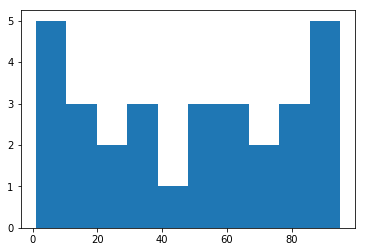

In [3]:
# eine Liste mit 30 Ganzzahlen, die z.B. das Alter von Personen in einer
# Gruppe darstellen können
alter = [37, 20, 84,  2, 11, 89, 52, 65, 90, 21, 30, 12, 17, 53, 62, 45, 37,
        3,  6, 64, 85,  6, 95, 73, 68, 55, 86, 83, 91,  1]

# für Visualisierungen benutzen wir die Blbiothek "matplotlib.pyplot"
import matplotlib.pyplot as plt

# Histogramme lassen sich einfach mit der Funktion plt.hist() erstellen
plt.hist(alter);

Visualisierungen sollten immer mit Achsenbeschriftungen versehen werden. Dafür verwenden wir die Funktionen ```plt.xlabel()``` und ```plt.ylabel```. Außerdem können wir der Abbildung mit ```plt.title()``` einen Titel geben. Mit verschiedenen optionalen Argumenten lässt sich das Verhalten von ```plt.hist()``` anpassen:
* ```bins``` ändert die Anzahl der Bins
* ```range``` ändert den dargestellten Bereich auf der x-Achse
* ```rwidth``` ändert die dargestellte bin-Weite 
* ```color``` ändert die Farbe
* ```alpha``` ändert den Alpha-Wert (Durchsichtigkeit) der dargestellten Balken.

Plot-Funktionen haben oftmals sehr viele optionale Argumente (auch "keyword arguments" genannt). Um herauszufinden, wass die jeweiligen Funktionen alles können, lohnt sich ein Blick in die [Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Außerdem sollte jede Darstellung *immer* mit Achsenbeschriftungen und eventuell einem Titel versehen werden:

Text(0.5,1,'Verteilung des Alters')

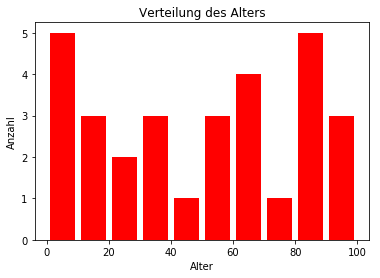

In [34]:
plt.hist(alter, color='red', rwidth=0.8, range=[0,100], bins=10, label='alter')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Verteilung des Alters')

**A.** Erstelle ein Histogramm der Längen der Kapitel im koptischen Markus-Evangelium.  
**B.** Mache dich mit den unterschiedlichen Argumenten der Funktion ```plt.hist()``` vertraut, indem du verschiedene Werte und Kombinationen für die Daten ausprobierst. Finde Werte, die die Daten deiner Meinung nach gut und verständlich darstellen. Worauf kommt es dabei an? Versieh die Darstellung mit passenden Beschriftungen.  
**C.** Insbesondere das Argument ```bins``` verändert die Darstellung des Histogrammes sehr stark. Was kann schiefgehen, wenn ```bins``` zu niedrig oder zu hoch gewählt wird? Was ist eine gute Wahl für einen Datensatz?  
**D.** Stelle die Kapitellänge des koptischen und des Englischen Markus-Evangeliums im selben Histogram dar. <font color='green'>**HINWEIS:** Du kannst einfach in der selben Code-Zelle zwei mal hintereinander die Funktion ```plt.hist()``` (natürlich mit unterschiedlichen Daten) aufrufen, um die Daten übereinandergelegt darzustellen. Du kannst mit der Funktion ```plt.legend()``` eine Legende zur Abbildung hinzufügen. Damit das funktioniert, musst du den einzelen plot-Befehlen vorher ein entsprechendes ```label``` Argument mitgeben.</font> Was fällt dir auf? Worauf musst du achten, damit die beiden Histogramme vergleichbar sind?  
**E. (Optional)** Was hat es mit den beiden keyword arguments ```density``` und ```cumulative``` auf sich? Wie verändert sich das Histogram und wie kann die Darstellung dann interpretiert werden?

[Anfang](#top)